# Plot mensuel mxl GLORYS2V3 janvier


In [3]:
## imports

import numpy as np
import dask
import xarray as xr
import GriddedData
import time

#- Other modules
import os
from glob import glob
import numpy.ma as ma
import scipy as sc
import WavenumberSpectrum as ws
import dask.array as da
from netCDF4 import Dataset

### palette
from matplotlib.colors import LogNorm
import matplotlib.cm as mplcm
import colormap as cmaps
import matplotlib.cm as cm

import seaborn as sns

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

### quick plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## local/specific imports
import oocgcm
import oocgcm.filtering
import oocgcm.filtering.linearfilters as tf

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

%matplotlib inline

In [4]:
filev3="/media/extra/DATA/GLORYS/GLORYS2V3_NACHOS025_201001_mxl.nc"
file10v4="/media/extra/DATA/GLORYS/GLORYS2V4_ORCA025_201001_grid2D.nc"
file11v4="/media/extra/DATA/GLORYS/GLORYS2V4_ORCA025_201101_grid2D.nc"
file12v4="/media/extra/DATA/GLORYS/GLORYS2V4_ORCA025_201201_grid2D.nc"
file13v4="/media/extra/DATA/GLORYS/GLORYS2V4_ORCA025_201301_grid2D.nc"

In [8]:
dsv3=xr.open_dataset(filev3)
ds10v4=xr.open_dataset(file10v4)
ds11v4=xr.open_dataset(file11v4)
ds12v4=xr.open_dataset(file12v4)
ds13v4=xr.open_dataset(file13v4)

mxlv3=dsv3.somxl010[0]
mxl10v4=ds10v4.somxl010[0]
mxl11v4=ds11v4.somxl010[0]
mxl12v4=ds12v4.somxl010[0]
mxl13v4=ds13v4.somxl010[0]

latv3=dsv3.nav_lat
lonv3=dsv3.nav_lon
latv4=ds10v4.nav_lat
lonv4=ds10v4.nav_lon

maskv3=np.equal(mxlv3,99999.)
mask10v4=np.equal(mxl10v4,9.96921e+36)
mask11v4=np.equal(mxl11v4,9.96921e+36)
mask12v4=np.equal(mxl12v4,9.96921e+36)
mask13v4=np.equal(mxl13v4,9.96921e+36)

mxlv3_ma=np.ma.array(mxlv3,mask=maskv3)
mxl10v4_ma=np.ma.array(mxl10v4,mask=mask10v4)
mxl11v4_ma=np.ma.array(mxl11v4,mask=mask11v4)
mxl12v4_ma=np.ma.array(mxl12v4,mask=mask12v4)
mxl13v4_ma=np.ma.array(mxl13v4,mask=mask13v4)


In [10]:
def plot_mxl(mxl_ma,lat,lon,title,plotname):
    fig = plt.figure(figsize=(20,15))
    ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
    ax.set_extent([-60, 20, 40, 80])
    cmap = plt.cm.jet
    cmap.set_under(color='grey')
    pcolor=ax.pcolormesh(lon,lat,mxl_ma,transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=2000)
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    fig.subplots_adjust(right=0.8)
    ax.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
    ax.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label='m')
    fig.suptitle(title, fontsize=25)
    plt.savefig(plotname)

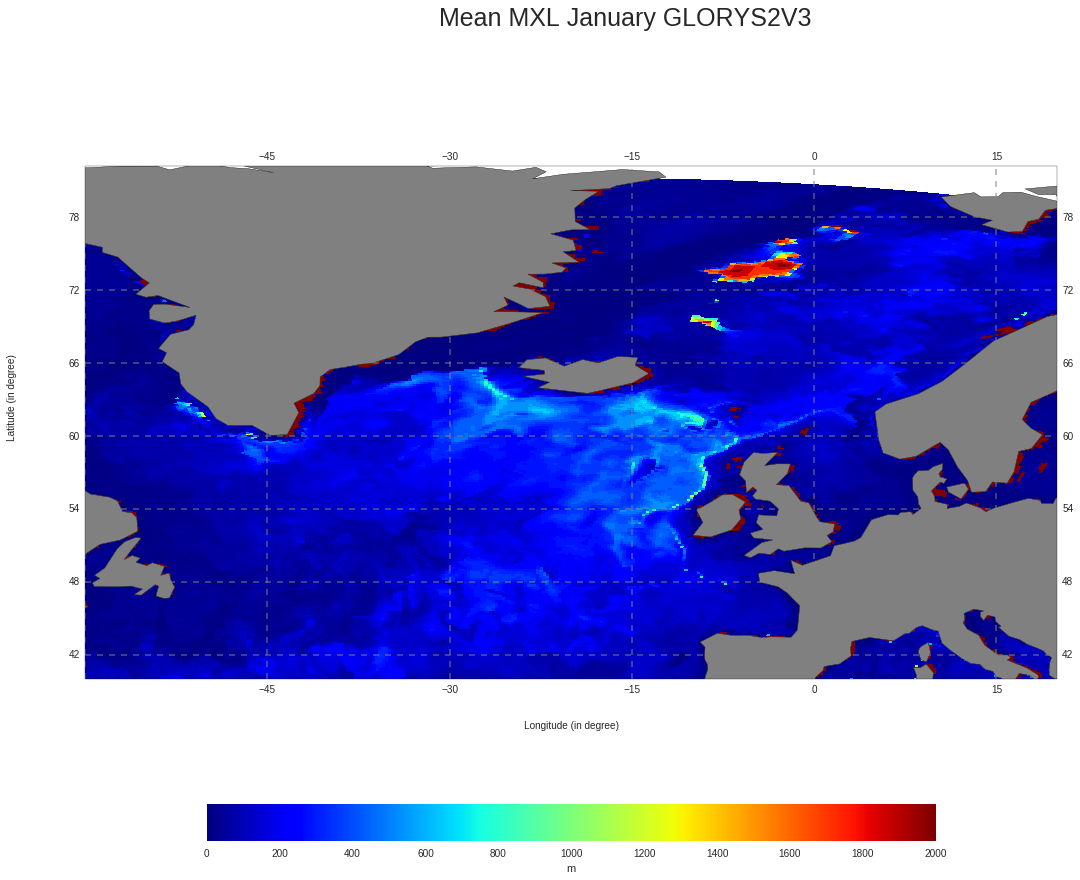

In [12]:
plot_mxl(mxlv3,latv3,lonv3,"Mean MXL January 2010 GLORYS2V3","/media/extra/DATA/GLORYS/plot_mxl201001_glorys2v3.png")

/home/albert/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


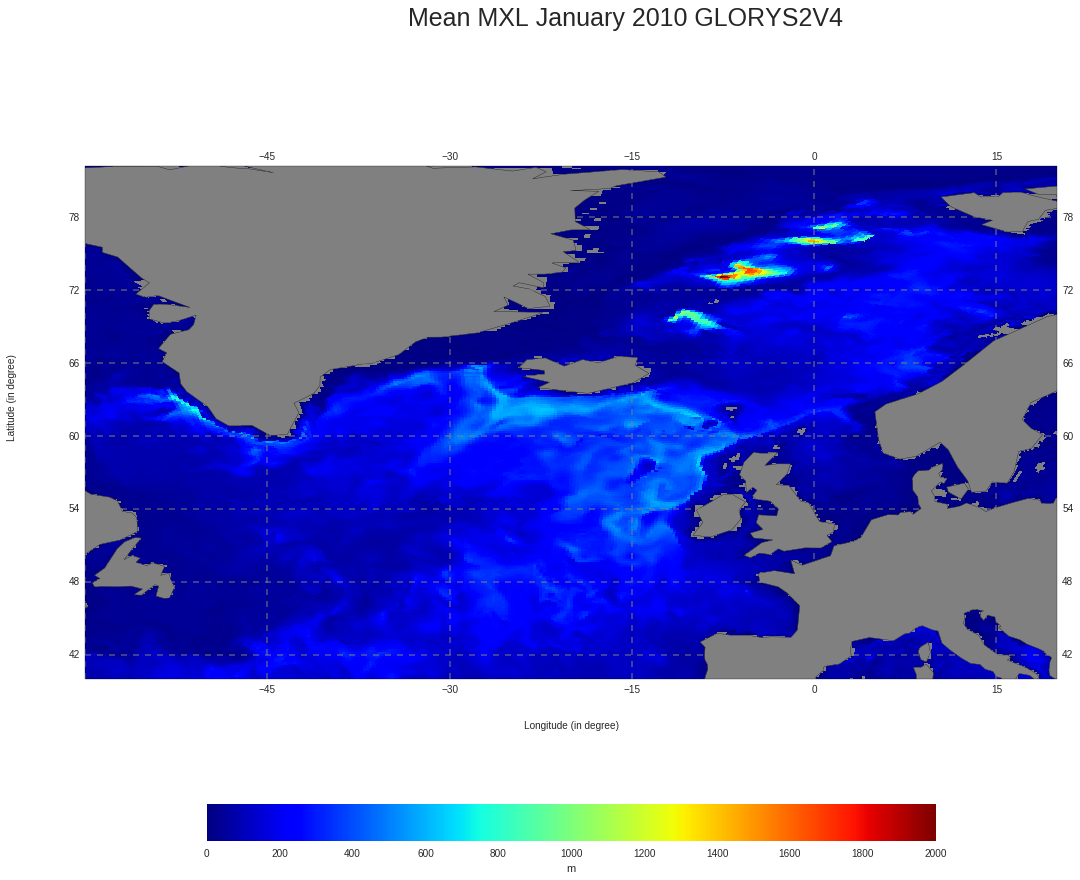

In [13]:
plot_mxl(mxl10v4,latv4,lonv4,"Mean MXL January 2010 GLORYS2V4","/media/extra/DATA/GLORYS/plot_mxl201001_glorys2v4.png")

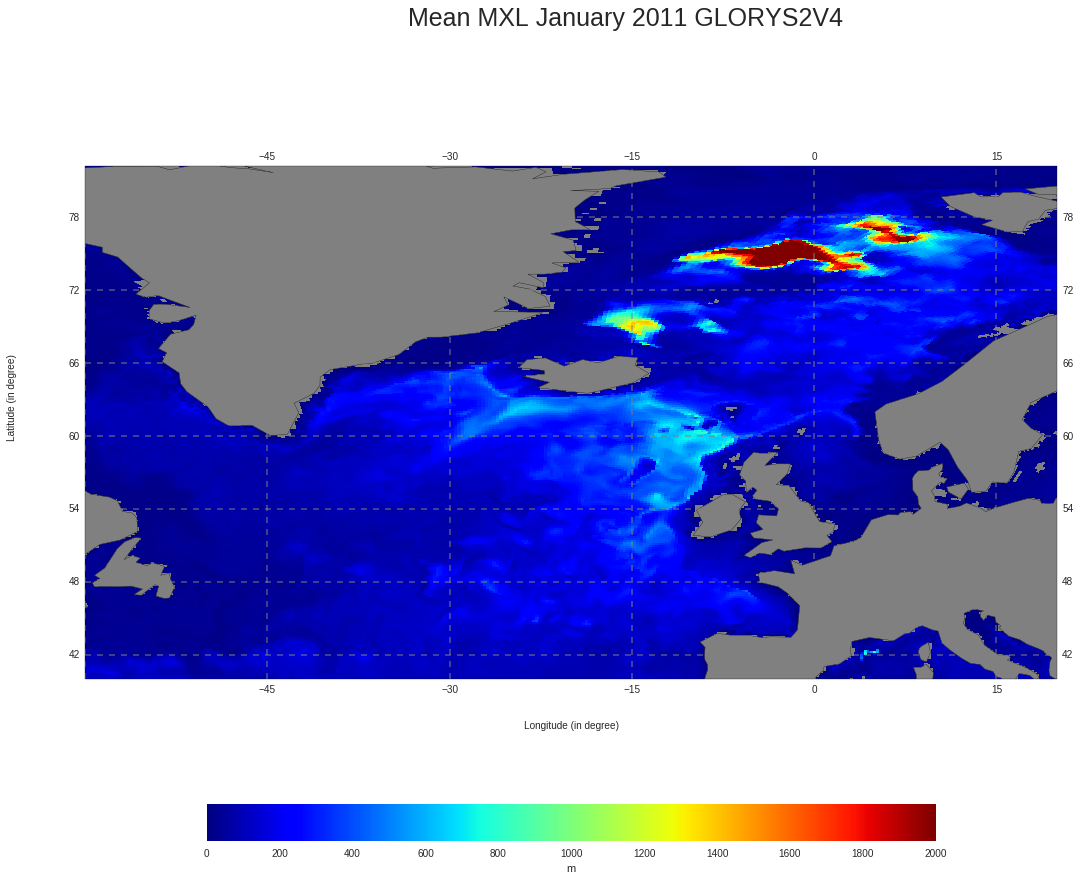

In [14]:
plot_mxl(mxl11v4,latv4,lonv4,"Mean MXL January 2011 GLORYS2V4","/media/extra/DATA/GLORYS/plot_mxl201101_glorys2v4.png")

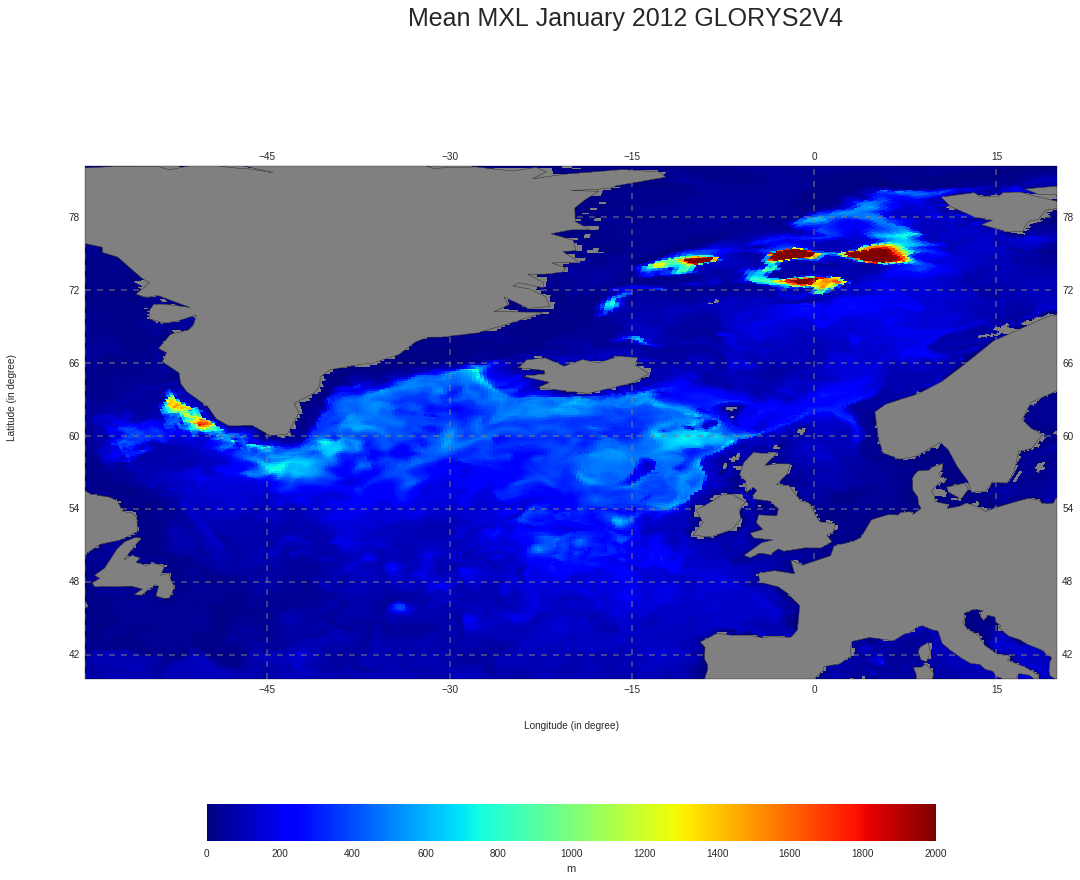

In [16]:
plot_mxl(mxl12v4,latv4,lonv4,"Mean MXL January 2012 GLORYS2V4","/media/extra/DATA/GLORYS/plot_mxl201201_glorys2v4.png")

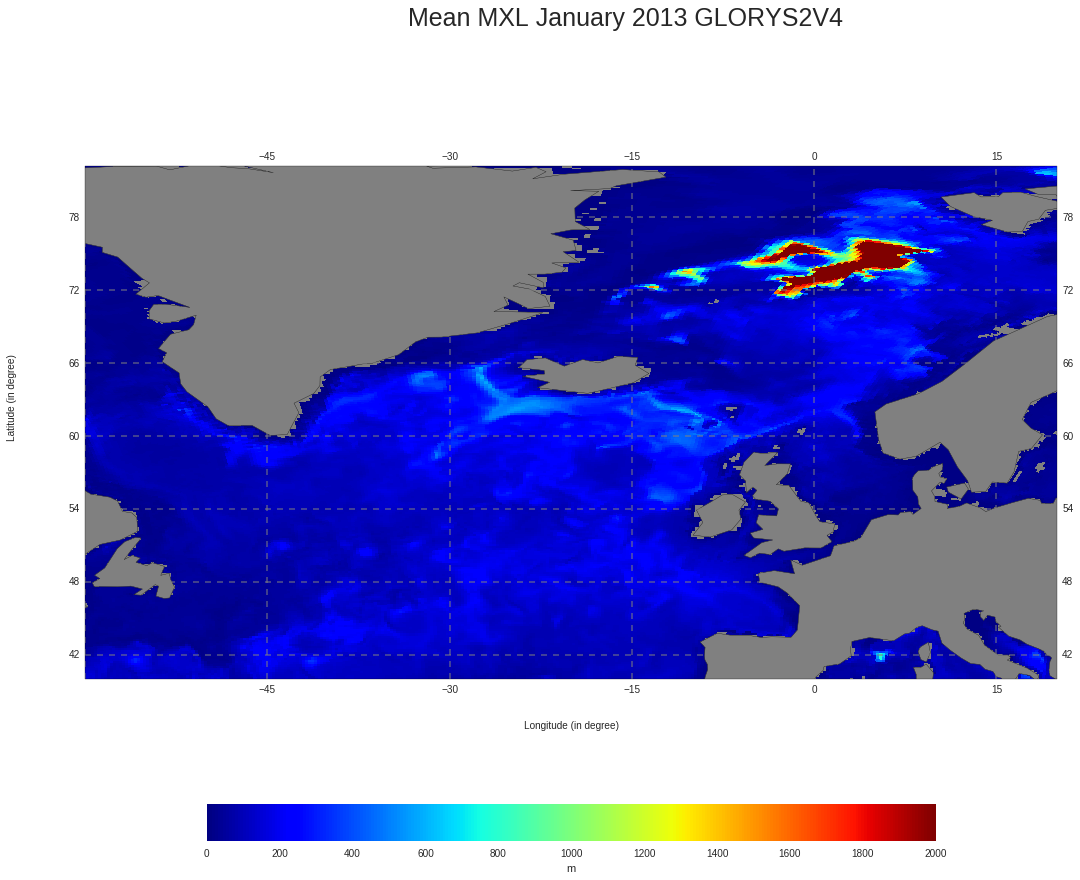

In [17]:
plot_mxl(mxl13v4,latv4,lonv4,"Mean MXL January 2013 GLORYS2V4","/media/extra/DATA/GLORYS/plot_mxl201301_glorys2v4.png")

In [30]:
def plot2_mxl(mxl_ma1,lat1,lon1,mxl_ma2,lat2,lon2,title,plotname):
    fig = plt.figure(figsize=(20,7))
    ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree(central_longitude=-30))
    ax1.set_extent([-60, 20, 40, 80])
    cmap = plt.cm.jet
    cmap.set_under(color='grey')
    pcolor1=ax1.pcolormesh(lon1,lat1,mxl_ma1,transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=2000)
    ax1.add_feature(cfeature.LAND,facecolor='grey')
    ax1.coastlines()
    ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    fig.subplots_adjust(right=0.8)
    ax1.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
    ax1.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes)
    cbar1 = plt.colorbar(pcolor1,orientation='horizontal',shrink=0.75,label='m')
    ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree(central_longitude=-30))
    ax2.set_extent([-60, 20, 40, 80])
    cmap = plt.cm.jet
    cmap.set_under(color='grey')
    pcolor2=ax2.pcolormesh(lon2,lat2,mxl_ma2,transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=2000)
    ax2.add_feature(cfeature.LAND,facecolor='grey')
    ax2.coastlines()
    ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    fig.subplots_adjust(right=0.8)
    ax2.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax2.transAxes)
    ax2.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax2.transAxes)
    cbar2 = plt.colorbar(pcolor2,orientation='horizontal',shrink=0.75,label='m')
    fig.suptitle(title, fontsize=25)
    plt.savefig(plotname)

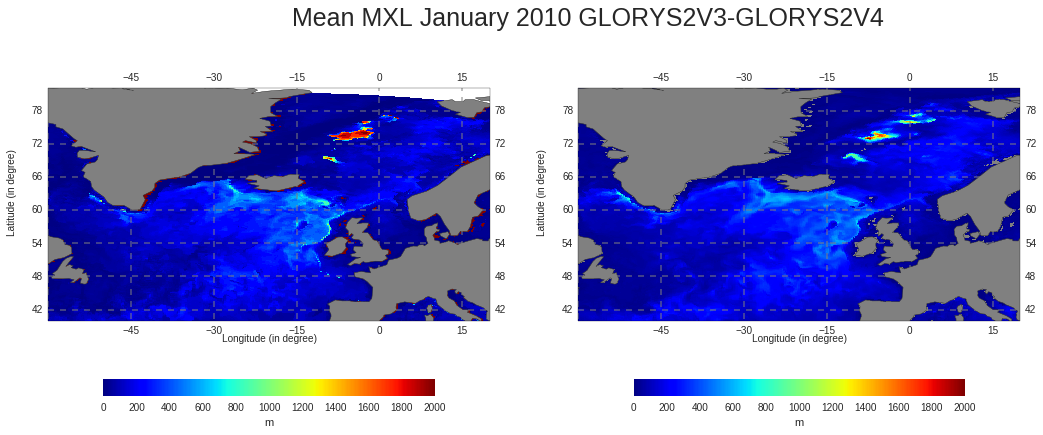

In [39]:
plot2_mxl(mxlv3,latv3,lonv3,mxl10v4,latv4,lonv4,"Mean MXL January 2010 GLORYS2V3-GLORYS2V4","/media/extra/DATA/GLORYS/plot_mxl201001_glorys2v3-v4.png")

In [35]:
def plot4_mxl(mxl_ma1,lat1,lon1,mxl_ma2,lat2,lon2,mxl_ma3,lat3,lon3,mxl_ma4,lat4,lon4,title,plotname):
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(221,projection=ccrs.PlateCarree(central_longitude=-30))
    ax1.set_extent([-60, 20, 40, 80])
    cmap = plt.cm.jet
    cmap.set_under(color='grey')
    pcolor1=ax1.pcolormesh(lon1,lat1,mxl_ma1,transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=2000)
    ax1.add_feature(cfeature.LAND,facecolor='grey')
    ax1.coastlines()
    ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    fig.subplots_adjust(right=0.8)
    ax1.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
    ax1.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes)
    cbar1 = plt.colorbar(pcolor1,orientation='horizontal',shrink=0.75,label='m')
    ax2 = fig.add_subplot(222,projection=ccrs.PlateCarree(central_longitude=-30))
    ax2.set_extent([-60, 20, 40, 80])
    cmap = plt.cm.jet
    cmap.set_under(color='grey')
    pcolor2=ax2.pcolormesh(lon2,lat2,mxl_ma2,transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=2000)
    ax2.add_feature(cfeature.LAND,facecolor='grey')
    ax2.coastlines()
    ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    fig.subplots_adjust(right=0.8)
    ax2.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax2.transAxes)
    ax2.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax2.transAxes)
    cbar2 = plt.colorbar(pcolor2,orientation='horizontal',shrink=0.75,label='m')
    ax3 = fig.add_subplot(223,projection=ccrs.PlateCarree(central_longitude=-30))
    ax3.set_extent([-60, 20, 40, 80])
    cmap = plt.cm.jet
    cmap.set_under(color='grey')
    pcolor3=ax3.pcolormesh(lon3,lat3,mxl_ma3,transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=2000)
    ax3.add_feature(cfeature.LAND,facecolor='grey')
    ax3.coastlines()
    ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    fig.subplots_adjust(right=0.8)
    ax3.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax3.transAxes)
    ax3.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax3.transAxes)
    cbar3 = plt.colorbar(pcolor3,orientation='horizontal',shrink=0.75,label='m')
    ax4 = fig.add_subplot(224,projection=ccrs.PlateCarree(central_longitude=-30))
    ax4.set_extent([-60, 20, 40, 80])
    cmap = plt.cm.jet
    cmap.set_under(color='grey')
    pcolor4=ax4.pcolormesh(lon4,lat4,mxl_ma4,transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=2000)
    ax4.add_feature(cfeature.LAND,facecolor='grey')
    ax4.coastlines()
    ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    fig.subplots_adjust(right=0.8)
    ax4.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax4.transAxes)
    ax4.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax4.transAxes)
    cbar4 = plt.colorbar(pcolor4,orientation='horizontal',shrink=0.75,label='m')
    fig.suptitle(title, fontsize=25)
    plt.savefig(plotname)

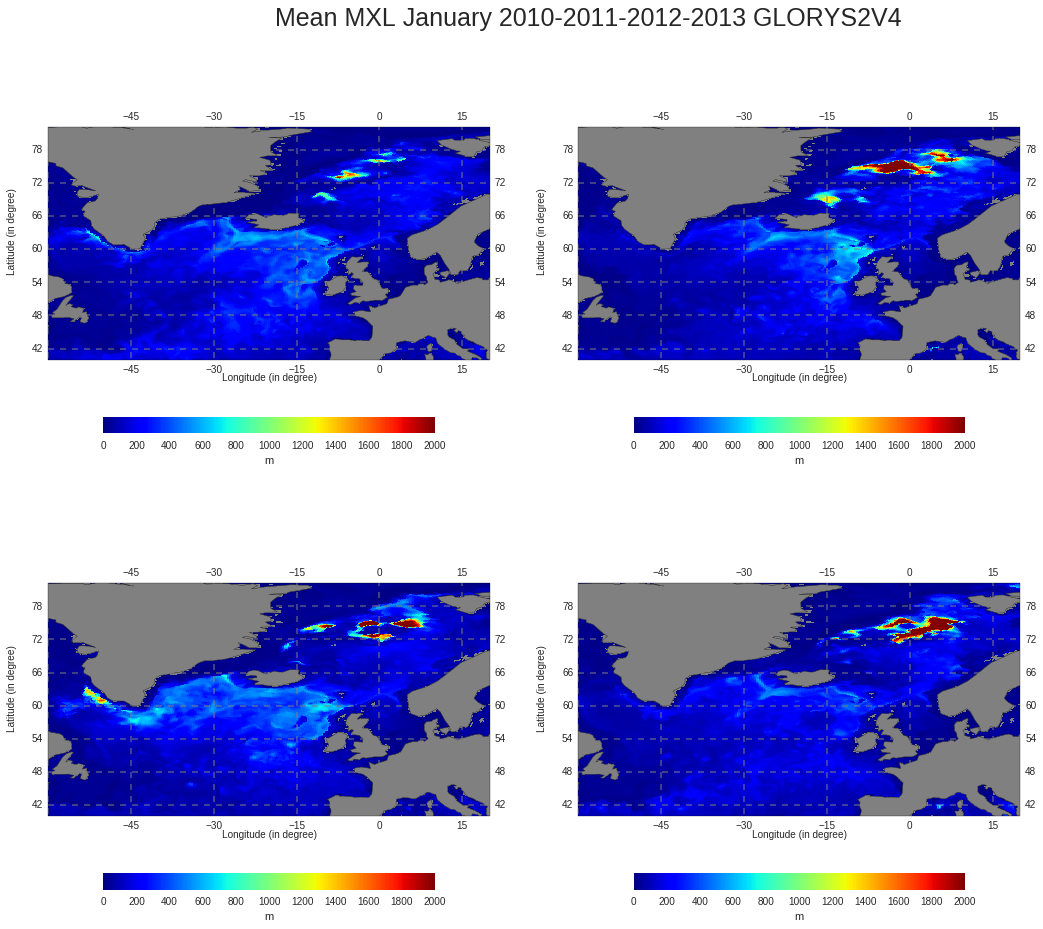

In [38]:
plot4_mxl(mxl10v4,latv4,lonv4,mxl11v4,latv4,lonv4,mxl12v4,latv4,lonv4,mxl13v4,latv4,lonv4,"Mean MXL January 2010-2011-2012-2013 GLORYS2V4","/media/extra/DATA/GLORYS/plot_mxl2010-11-12-1301_glorys2v4.png")